<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import modbp 
import os,sys,re
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from time import time
sys.path.append(os.path.abspath('.'))
from create_multiplex_functions import call_gen_louvain
graphics_dir="/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics/"


In [2]:
ntrials=10

#we scale the number of edges proportionally
sizes=[80,160,320,640,1280,2560]
# sizes=[160]

time_df=pd.DataFrame()

for q in [2,4,8]:
    print(q,end=',s= ')
    for i,s in enumerate(sizes):
        print(s,end=', ')
        for ntrial in range(ntrials):
            print()
            csbm=modbp.generate_planted_partitions_dynamic_sbm(n=s,nlayers=5,c=10,eta=.1,
                                                          ncoms=q,epsilon=.1)
            t=time()
            bpobj=modbp.ModularityBP(csbm,use_effective=True,
                                     align_communities_across_layers_temporal=False)
            bstar=bpobj.get_bstar(q=q,omega=1.0)
            bpobj.run_modbp(q=q,beta=bstar,resgamma=1.0,omega=1.0)
            tfin=time()-t
            cind=time_df.shape[0]

            t=time()
            S,rt_gl=call_gen_louvain(csbm,gamma=1.0,omega=1.0)
            tgenlouvain=time()-t

            time_df.loc[cind,'s']=s
            time_df.loc[cind,'q']=q
            time_df.loc[cind,'num_coms_bp']=bpobj.retrieval_modularities.iloc[-1,:]['num_coms']
            time_df.loc[cind,'num_coms_gl']=len(np.unique(S))
            time_df.loc[cind,'ntrial']=ntrial
            time_df.loc[cind,'time_modbp']=tfin
            time_df.loc[cind,'time_genlouvain']=rt_gl
            time_df.loc[cind,'niters']=bpobj.retrieval_modularities.iloc[-1,:]['niters']
            time_df.loc[cind,'converged']=bpobj.retrieval_modularities.iloc[-1,:]['converged']
            time_df.loc[cind,'is_trivial']=bpobj.retrieval_modularities.iloc[-1,:]['is_trivial']
            time_df.loc[cind,'AMI_layer_avg_modbp']=bpobj.retrieval_modularities.iloc[-1,:]['AMI_layer_avg']
            time_df.loc[cind,'AMI_layer_avg_genlouvain']=csbm.get_AMI_layer_avg_with_communities(S)
            
    print()


2,s= 80, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
160, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
320, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
640, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
1280, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
2560, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''

4,s= 80, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
160, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
320, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
640, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
1280, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
2560, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''

8,s= 80, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
160, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
320, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
640, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
1280, 
b''

b''

b''

b''

b''

b''

b''

b''

b''

b''
2560, 
b''

b''

b''

b''

b''

b''

b''

b''


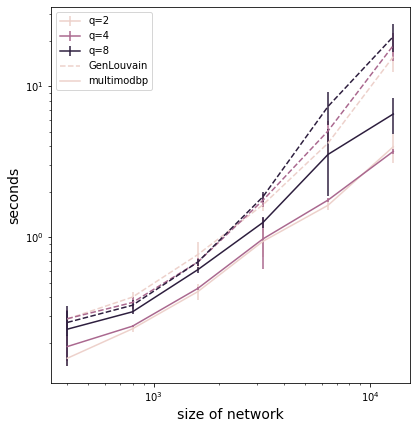

In [14]:
outfile=os.path.join(graphics_dir,"time_trial_vs_genlouvain.png")


time_filt=time_df.loc[time_df['converged'],:]
times_modbp_mean=time_filt.groupby(['q','s'])['time_modbp'].mean()
times_modbp_std=time_filt.groupby(['q','s'])['time_modbp'].std()

times_gl_mean=time_df.groupby(['q','s'])['time_genlouvain'].mean()
times_gl_std=time_df.groupby(['q','s'])['time_genlouvain'].std()

qvals=time_df['q'].unique()
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
colors=sbn.cubehelix_palette(n_colors=len(qvals))
for i,q in enumerate(qvals):
    
    a.errorbar(x=5*times_modbp_mean[q].index,y=times_modbp_mean[q].values,
               yerr=times_modbp_std[q],color=colors[i],
               label='q={:d}'.format(int(q)))
    a.errorbar(x=5*times_gl_mean[q].index,y=times_gl_mean[q].values,
               yerr=times_gl_std[q],color=colors[i],linestyle='--',)

a.errorbar([],[],color=colors[0],linestyle='--',label='GenLouvain')
a.errorbar([],[],color=colors[0],label='multimodbp')

a.set_ylabel("seconds",fontsize=14)
a.set_xlabel("size of network",fontsize=14)
# a.set_title("Time trial: Multimodbp vs GenLouvain on DSBM model",fontsize=18)
a.set_xscale("log")
a.set_yscale("log")

l=a.legend()
f.subplots_adjust(top=.95,bottom=.08,right=.95,left=.12)
f.savefig(outfile,dpi=200)
plt.show()


In [5]:
time_df.loc[np.logical_and(time_df['q']==8,time_df['s']==640),:]

,s,q,num_coms_bp,num_coms_gl,ntrial,time_modbp,time_genlouvain,niters,converged,is_trivial,AMI_layer_avg_modbp,AMI_layer_avg_genlouvain
150,640.0,8.0,8.0,4.0,0.0,1.269043,1.882371,24.0,True,False,0.952305,0.667518
151,640.0,8.0,8.0,5.0,1.0,1.469156,1.730042,37.0,True,False,0.917045,0.832667
152,640.0,8.0,8.0,2.0,2.0,1.199465,1.900954,20.0,True,False,0.917754,0.474406
153,640.0,8.0,8.0,5.0,3.0,1.227238,2.042685,21.0,True,False,0.924397,0.833010
154,640.0,8.0,8.0,3.0,4.0,251.510008,1.827751,17.0,True,False,0.901635,0.659496
155,640.0,8.0,8.0,3.0,5.0,1.160763,1.655979,18.0,True,False,0.918785,0.620777
156,640.0,8.0,8.0,4.0,6.0,1.265841,1.825429,22.0,True,False,0.900771,0.728374
157,640.0,8.0,8.0,4.0,7.0,1.177827,1.683463,19.0,True,False,0.936741,0.731088
158,640.0,8.0,8.0,4.0,8.0,1.346286,1.999065,30.0,True,False,0.958910,0.726229
159,640.0,8.0,8.0,3.0,9.0,1.149330,1.951778,17.0,True,False,0.958910,0.629648


In [24]:
time_df.loc[time_df['q']==8,:]

,s,q,num_coms_bp,num_coms_gl,ntrial,time_modbp,time_genlouvain,AMI_layer_avg_modbp,AMI_layer_avg_genlouvain
120,80.0,8.0,7.0,2.0,0.0,0.347409,5.069254,0.942997,3.064617e-01
121,80.0,8.0,8.0,3.0,1.0,8.789640,5.334104,0.897369,6.192096e-01
122,80.0,8.0,8.0,2.0,2.0,5.120293,4.843398,0.947052,4.340009e-01
123,80.0,8.0,7.0,2.0,3.0,1.182433,4.777494,0.939245,3.159542e-01
124,80.0,8.0,8.0,2.0,4.0,1.145873,4.757931,0.949375,4.716042e-01
125,80.0,8.0,8.0,2.0,5.0,0.260678,4.763962,0.915436,4.771842e-01
126,80.0,8.0,7.0,2.0,6.0,10.043387,4.987747,0.912438,3.978446e-01
127,80.0,8.0,8.0,2.0,7.0,0.834652,4.797537,0.979793,4.466479e-01
128,80.0,8.0,8.0,3.0,8.0,10.351242,4.767370,0.907247,6.116363e-01
129,80.0,8.0,7.0,1.0,9.0,2.551917,4.808633,0.952873,-4.365748e-16


In [ ]:
a.errorbar